In [10]:
import mysql.connector
import pandas as pd

# MySQL Connection Details
host = "localhost"         # e.g., 'localhost'
user = "root"     # Replace with MySQL username
password = "Admin111" # Replace with MySQL password

# Connect to MySQL Server
conn = mysql.connector.connect(host=host, user=user, password=password)

# Create a Cursor Object
cursor = conn.cursor()

# List of Databases to Load
databases = ["jotstar_db", "liocinema_db"]

# Dictionary to Store DataFrames
db_tables = {}

# Iterate Over Each Database
for db in databases:
    cursor.execute(f"USE {db}")  # Switch to Database
    
    # Fetch All Tables in the Database
    cursor.execute("SHOW TABLES")
    tables = cursor.fetchall()

    db_tables[db] = {}  # Dictionary for Tables in Each DB

    # Iterate Over Each Table and Load Data
    for (table_name,) in tables:
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql(query, conn)
        db_tables[db][table_name] = df  # Store DataFrame

# Close Connection
cursor.close()
conn.close()


C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\1548593424.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
# print(db_tables["jotstar_db"].keys())  # List of tables in jotstart_db
# print(db_tables["liocinema_db"]["movies"].head())  # Replace 'movies' with actual table

In [12]:
jot_subs = db_tables['jotstar_db']['subscribers']

In [13]:
lio_subs = db_tables["liocinema_db"]['subscribers']

In [14]:
jot_subs.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,None,None,None
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,None,None,None
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,None,None,None
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,None,None,None
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,None,None,None


In [15]:
lio_subs.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDLC00000bea68a,25-34,Tier 3,2024-10-24,Free,None,None,None
1,UIDLC00009202848,18-24,Tier 1,2024-09-18,Basic,None,None,None
2,UIDLC0001086afc3,35-44,Tier 2,2024-03-23,Premium,None,2024-04-23,Free
3,UIDLC000186abd93,18-24,Tier 3,2024-09-07,Free,2024-10-23,None,None
4,UIDLC0002189b09f,18-24,Tier 2,2024-10-07,Premium,None,2024-11-07,Free


## 1. What is the total number of users for LioCinema and Jotstar, and how do they compare in terms of growth trends (January–November 2024)?

## 1.1 Total number of users 

In [16]:
# total number of subscribers in each platform from January to November 2024.

# Convert subscription_date column to datetime format
lio_subs["subscription_date"] = pd.to_datetime(lio_subs["subscription_date"])
jot_subs["subscription_date"] = pd.to_datetime(jot_subs["subscription_date"])

# Filter for users who subscribed between Jan 1, 2024, and Nov 30, 2024
lio_2024 = lio_subs[(lio_subs["subscription_date"] >= "2024-01-01") & 
                     (lio_subs["subscription_date"] <= "2024-11-30")]

jot_2024 = jot_subs[(jot_subs["subscription_date"] >= "2024-01-01") & 
                     (jot_subs["subscription_date"] <= "2024-11-30")]

# Total count of users
total_lio_users = len(lio_2024)
total_jot_users = len(jot_2024)

print(f"Total LioCinema Users (Jan-Nov 2024): {total_lio_users}")
print(f"Total Jotstar Users (Jan-Nov 2024): {total_jot_users}")


Total LioCinema Users (Jan-Nov 2024): 183446
Total Jotstar Users (Jan-Nov 2024): 44620


## 1.2 Growth Trend Comparison 

In [17]:
# Group by month and count new subscribers
lio_trend = lio_2024.groupby(lio_2024["subscription_date"].dt.to_period("M")).size()
jot_trend = jot_2024.groupby(jot_2024["subscription_date"].dt.to_period("M")).size()

# Convert period to string for plotting
lio_trend.index = lio_trend.index.astype(str)
jot_trend.index = jot_trend.index.astype(str)

# Print growth trends
print("\nLioCinema Monthly Subscribers:\n", lio_trend)
print("\nJotstar Monthly Subscribers:\n", jot_trend)


LioCinema Monthly Subscribers:
 subscription_date
2024-01     6758
2024-02     7404
2024-03     8397
2024-04     9759
2024-05    11977
2024-06    13768
2024-07    16161
2024-08    19247
2024-09    23873
2024-10    29105
2024-11    36997
dtype: int64

Jotstar Monthly Subscribers:
 subscription_date
2024-01    3934
2024-02    3939
2024-03    3954
2024-04    3984
2024-05    3998
2024-06    4020
2024-07    4067
2024-08    4103
2024-09    4163
2024-10    4196
2024-11    4262
dtype: int64


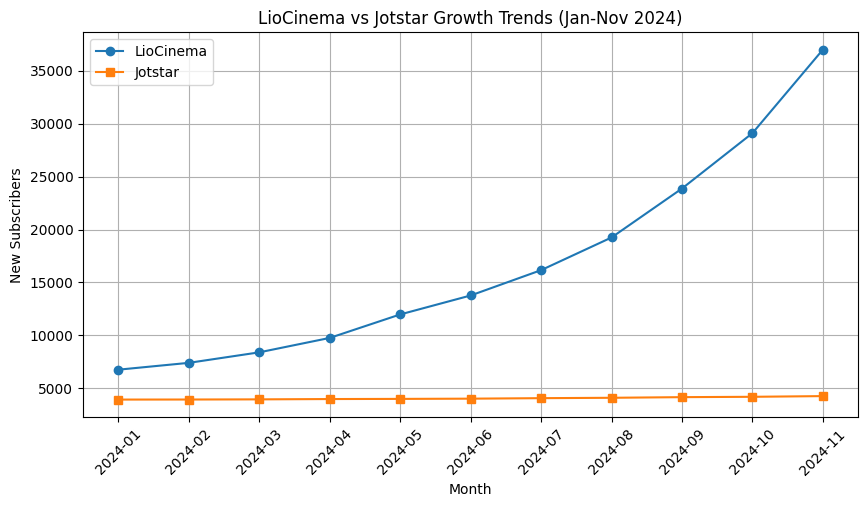

In [18]:
## 1.3 Visualizing Growth Trends

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(lio_trend.index, lio_trend.values, marker='o', linestyle='-', label="LioCinema")
plt.plot(jot_trend.index, jot_trend.values, marker='s', linestyle='-', label="Jotstar")

plt.xlabel("Month")
plt.ylabel("New Subscribers")
plt.title("LioCinema vs Jotstar Growth Trends (Jan-Nov 2024)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)

plt.show()

## 2 What is the total number of contents available on LioCinema vs. Jotstar? How do they differ in terms of language and content type?

In [19]:
jot_contents = db_tables['jotstar_db']["contents"]
lio_contents = db_tables["liocinema_db"]["contents"]

In [20]:
# Total count of contents
total_lio_contents = len(lio_contents)
total_jot_contents = len(jot_contents)

print(f"Total Content on LioCinema: {total_lio_contents}")
print(f"Total Content on Jotstar: {total_jot_contents}")


Total Content on LioCinema: 1250
Total Content on Jotstar: 2360


In [21]:
# Comparison of content by Language 
lio_lang_dist = lio_contents["language"].value_counts()
jot_lang_dist = jot_contents["language"].value_counts()

print("\nLioCinema Content Distribution by Language:\n", lio_lang_dist)
print("\nJotstar Content Distribution by Language:\n", jot_lang_dist)


LioCinema Content Distribution by Language:
 language
Hindi        424
Telugu       242
Tamil        221
Malayalam    121
Kannada      118
Marathi       68
English       56
Name: count, dtype: int64

Jotstar Content Distribution by Language:
 language
English      800
Hindi        637
Tamil        251
Telugu       244
Kannada      121
Malayalam    118
Marathi       74
Bengali       60
Gujarati      28
Punjabi       27
Name: count, dtype: int64


### Graph on Language distribution

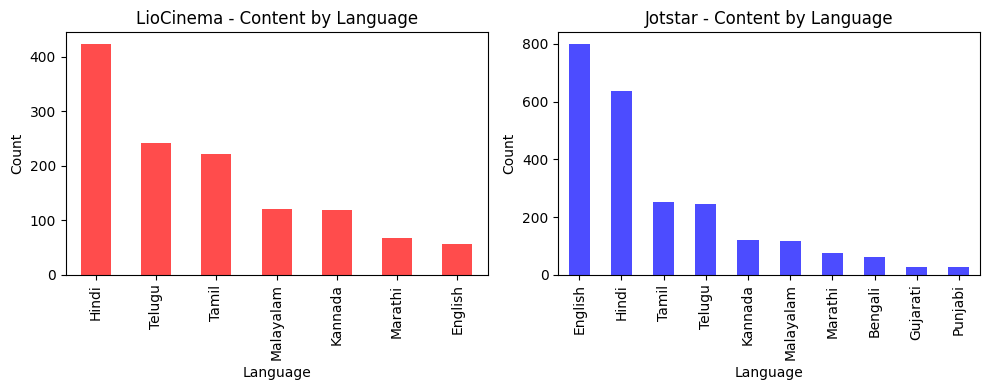

In [23]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_lang_dist.plot(kind="bar", color="red", alpha=0.7)
plt.title("LioCinema - Content by Language")
plt.xlabel("Language")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
jot_lang_dist.plot(kind="bar", color="blue", alpha=0.7)
plt.title("Jotstar - Content by Language")
plt.xlabel("Language")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Comparison of Content by Type (Movie vs. Series)

In [24]:
lio_type_dist = lio_contents["content_type"].value_counts()
jot_type_dist = jot_contents["content_type"].value_counts()

print("\nLioCinema Content Distribution by Type:\n", lio_type_dist)
print("\nJotstar Content Distribution by Type:\n", jot_type_dist)


LioCinema Content Distribution by Type:
 content_type
Movie     900
Series    300
Sports     50
Name: count, dtype: int64

Jotstar Content Distribution by Type:
 content_type
Movie     1180
Series     826
Sports     354
Name: count, dtype: int64


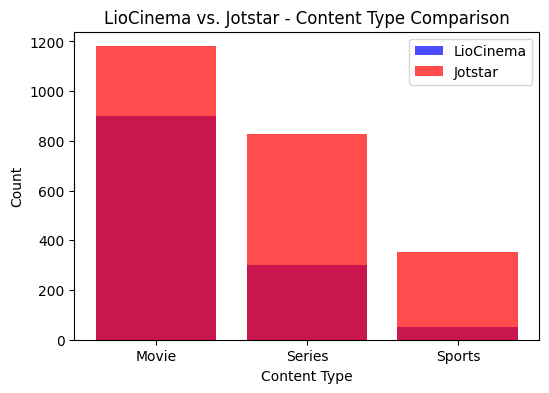

In [25]:
plt.figure(figsize=(6, 4))

plt.bar(lio_type_dist.index, lio_type_dist.values, alpha=0.7, label="LioCinema", color="blue")
plt.bar(jot_type_dist.index, jot_type_dist.values, alpha=0.7, label="Jotstar", color="red")

plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("LioCinema vs. Jotstar - Content Type Comparison")
plt.legend()
plt.show()


## 3. What is the distribution of users by age group, city tier, and subscription plan for each platform?

In [26]:
# Distribution by age group
lio_age_dist = lio_subs["age_group"].value_counts()
jot_age_dist = jot_subs["age_group"].value_counts()

print("\nLioCinema - Users by Age Group:\n", lio_age_dist)
print("\nJotstar - Users by Age Group:\n", jot_age_dist)


LioCinema - Users by Age Group:
 age_group
18-24    79813
25-34    52027
35-44    32560
45+      19046
Name: count, dtype: int64

Jotstar - Users by Age Group:
 age_group
25-34    20069
35-44    11274
18-24     7676
45+       5601
Name: count, dtype: int64


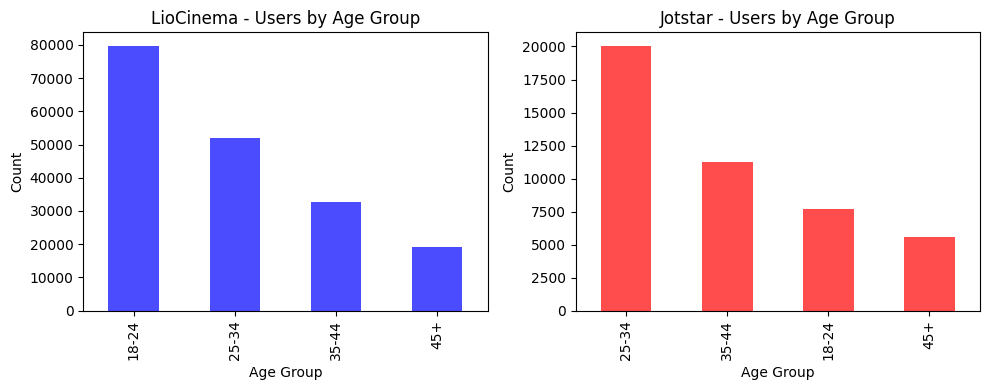

In [27]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_age_dist.plot(kind="bar", color="blue", alpha=0.7)
plt.title("LioCinema - Users by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
jot_age_dist.plot(kind="bar", color="red", alpha=0.7)
plt.title("Jotstar - Users by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [28]:
# Distribution by City Tier 
lio_city_dist = lio_subs["city_tier"].value_counts()
jot_city_dist = jot_subs["city_tier"].value_counts()

print("\nLioCinema - Users by City Tier:\n", lio_city_dist)
print("\nJotstar - Users by City Tier:\n", jot_city_dist)



LioCinema - Users by City Tier:
 city_tier
Tier 3    78587
Tier 2    63848
Tier 1    41011
Name: count, dtype: int64

Jotstar - Users by City Tier:
 city_tier
Tier 1    25451
Tier 2    13424
Tier 3     5745
Name: count, dtype: int64


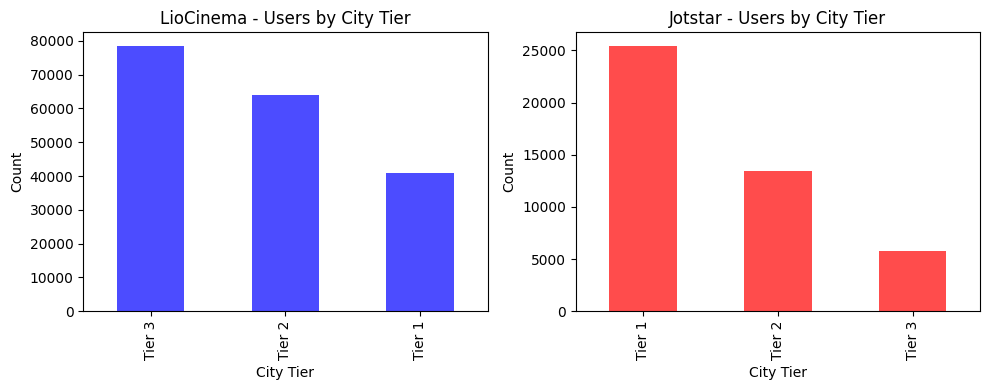

In [29]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_city_dist.plot(kind="bar", color="blue", alpha=0.7)
plt.title("LioCinema - Users by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
jot_city_dist.plot(kind="bar", color="red", alpha=0.7)
plt.title("Jotstar - Users by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [30]:
# Count users by subscription plan
lio_plan_dist = lio_subs["subscription_plan"].value_counts()
jot_plan_dist = jot_subs["subscription_plan"].value_counts()

print("\nLioCinema - Users by Subscription Plan:\n", lio_plan_dist)
print("\nJotstar - Users by Subscription Plan:\n", jot_plan_dist)



LioCinema - Users by Subscription Plan:
 subscription_plan
Free       104992
Basic       53362
Premium     25092
Name: count, dtype: int64

Jotstar - Users by Subscription Plan:
 subscription_plan
VIP        19157
Premium    13367
Free       12096
Name: count, dtype: int64


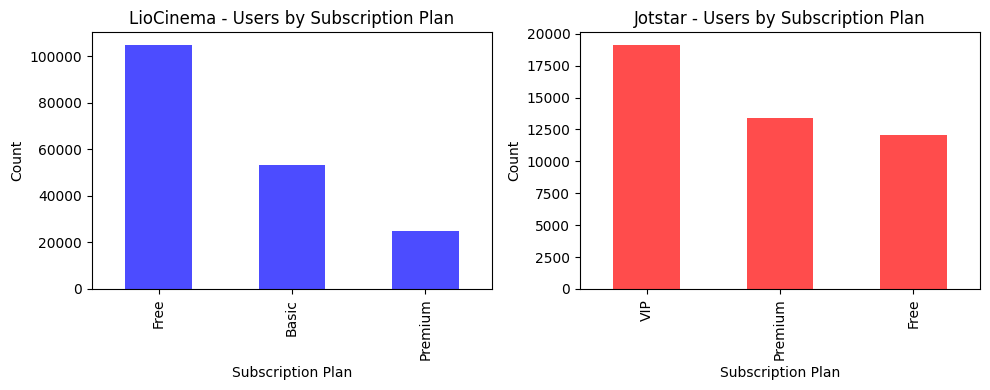

In [31]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_plan_dist.plot(kind="bar", color="blue", alpha=0.7)
plt.title("LioCinema - Users by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
jot_plan_dist.plot(kind="bar", color="red", alpha=0.7)
plt.title("Jotstar - Users by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


## 4. What percentage of LioCinema and Jotstar users are active vs. inactive? How do these rates vary by age group and subscription plan?

In [32]:
# Identify active and inactive users
lio_subs["is_active"] = lio_subs["last_active_date"].isna()
jot_subs["is_active"] = jot_subs["last_active_date"].isna()

# Count active and inactive users
lio_active_count = lio_subs["is_active"].sum()
lio_inactive_count = len(lio_subs) - lio_active_count

jot_active_count = jot_subs["is_active"].sum()
jot_inactive_count = len(jot_subs) - jot_active_count

# Calculate percentages
lio_active_pct = (lio_active_count / len(lio_subs)) * 100
lio_inactive_pct = 100 - lio_active_pct

jot_active_pct = (jot_active_count / len(jot_subs)) * 100
jot_inactive_pct = 100 - jot_active_pct

print(f"LioCinema - Active Users: {lio_active_pct:.2f}%, Inactive Users: {lio_inactive_pct:.2f}%")
print(f"Jotstar - Active Users: {jot_active_pct:.2f}%, Inactive Users: {jot_inactive_pct:.2f}%")

LioCinema - Active Users: 55.13%, Inactive Users: 44.87%
Jotstar - Active Users: 85.09%, Inactive Users: 14.91%


In [33]:
# Group by age group and calculate active percentage
lio_age_active = lio_subs.groupby("age_group")["is_active"].mean() * 100
jot_age_active = jot_subs.groupby("age_group")["is_active"].mean() * 100

print("\nLioCinema - Active Users by Age Group:\n", lio_age_active)
print("\nJotstar - Active Users by Age Group:\n", jot_age_active)


LioCinema - Active Users by Age Group:
 age_group
18-24    50.919023
25-34    57.452861
35-44    58.366093
45+      60.936680
Name: is_active, dtype: float64

Jotstar - Active Users by Age Group:
 age_group
18-24    84.405941
25-34    84.428721
35-44    85.932233
45+      86.716658
Name: is_active, dtype: float64


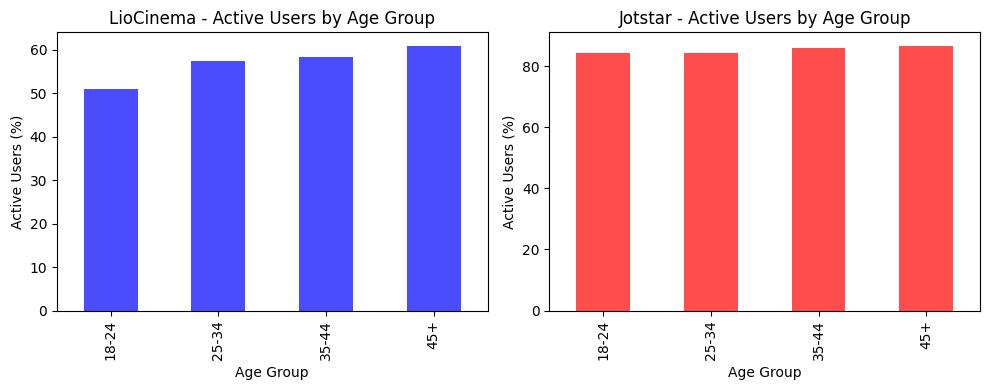

In [34]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_age_active.plot(kind="bar", color="blue", alpha=0.7)
plt.title("LioCinema - Active Users by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Active Users (%)")

plt.subplot(1, 2, 2)
jot_age_active.plot(kind="bar", color="red", alpha=0.7)
plt.title("Jotstar - Active Users by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Active Users (%)")

plt.tight_layout()
plt.show()


In [35]:
# Active vs. Inactive Users by Subscription Plan
# Group by subscription plan and calculate active percentage
lio_plan_active = lio_subs.groupby("subscription_plan")["is_active"].mean() * 100
jot_plan_active = jot_subs.groupby("subscription_plan")["is_active"].mean() * 100

print("\nLioCinema - Active Users by Subscription Plan:\n", lio_plan_active)
print("\nJotstar - Active Users by Subscription Plan:\n", jot_plan_active)



LioCinema - Active Users by Subscription Plan:
 subscription_plan
Basic      66.213785
Free       43.049947
Premium    82.133748
Name: is_active, dtype: float64

Jotstar - Active Users by Subscription Plan:
 subscription_plan
Free       74.264220
Premium    93.259520
VIP        86.229577
Name: is_active, dtype: float64


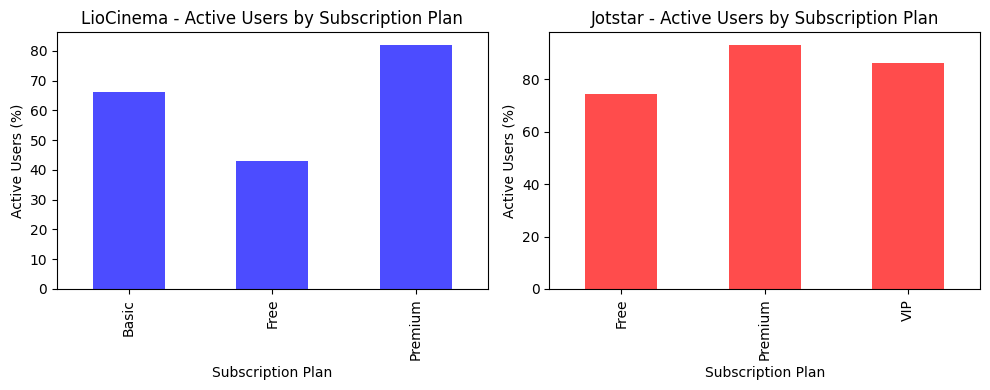

In [36]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_plan_active.plot(kind="bar", color="blue", alpha=0.7)
plt.title("LioCinema - Active Users by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Active Users (%)")

plt.subplot(1, 2, 2)
jot_plan_active.plot(kind="bar", color="red", alpha=0.7)
plt.title("Jotstar - Active Users by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Active Users (%)")

plt.tight_layout()
plt.show()

## 5. What is the average watch time for LioCinema vs. Jotstar during the analysis period? How do these compare by city tier and device type?

In [38]:
jot_watch = db_tables["jotstar_db"]["content_consumption"]
lio_watch = db_tables["liocinema_db"]["content_consumption"]

In [40]:
# Calculate average watch time
lio_avg_watch_time = lio_watch["total_watch_time_mins"].mean()
jot_avg_watch_time = jot_watch["total_watch_time_mins"].mean()

print(f"Average Watch Time on LioCinema: {lio_avg_watch_time:.2f} minutes")
print(f"Average Watch Time on Jotstar: {jot_avg_watch_time:.2f} minutes")

Average Watch Time on LioCinema: 1536.83 minutes
Average Watch Time on Jotstar: 7034.51 minutes


## Average Watch Time by City Tier

In [ ]:
# Merge watch data with subscriber data to get city_tier
lio_watch_city = lio_watch.merge(lio_subs[["user_id", "city_tier"]], on="user_id")
jot_watch_city = jot_watch.merge(jot_subs[["user_id", "city_tier"]], on="user_id")

# Group by city tier and calculate average watch time
lio_city_watch = lio_watch_city.groupby("city_tier")["total_watch_time_mins"].mean()
jot_city_watch = jot_watch_city.groupby("city_tier")["total_watch_time_mins"].mean()

print("\nLioCinema - Average Watch Time by City Tier:\n", lio_city_watch)
print("\nJotstar - Average Watch Time by City Tier:\n", jot_city_watch)


LioCinema - Average Watch Time by City Tier:
 city_tier
Tier 1    2106.144173
Tier 2    1624.779417
Tier 3    1093.479355
Name: total_watch_time_mins, dtype: float64

Jotstar - Average Watch Time by City Tier:
 city_tier
Tier 1    7883.653164
Tier 2    6300.336760
Tier 3    4988.203481
Name: total_watch_time_mins, dtype: float64


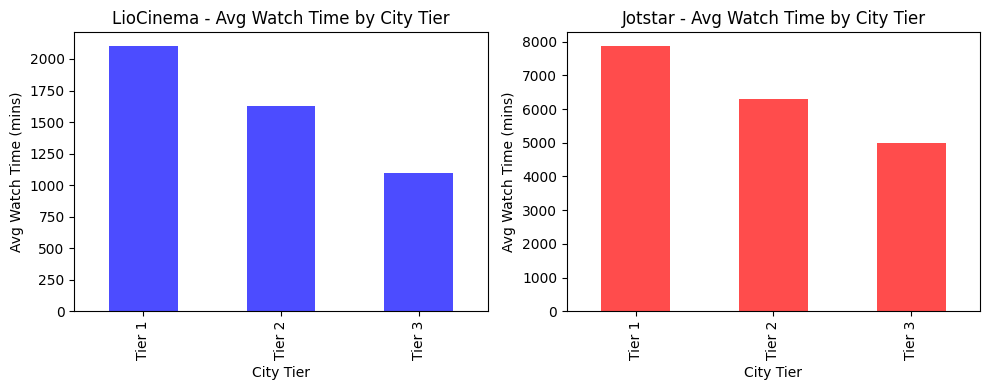

In [43]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_city_watch.plot(kind="bar", color="blue", alpha=0.7)
plt.title("LioCinema - Avg Watch Time by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Avg Watch Time (mins)")

plt.subplot(1, 2, 2)
jot_city_watch.plot(kind="bar", color="red", alpha=0.7)
plt.title("Jotstar - Avg Watch Time by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Avg Watch Time (mins)")

plt.tight_layout()
plt.show()


## Average Watch Time by Device Type

In [45]:
# Group by device type and calculate average watch time
lio_device_watch = lio_watch.groupby("device_type")["total_watch_time_mins"].mean()
jot_device_watch = jot_watch.groupby("device_type")["total_watch_time_mins"].mean()

print("\nLioCinema - Average Watch Time by Device Type:\n", lio_device_watch)
print("\nJotstar - Average Watch Time by Device Type:\n", jot_device_watch)


LioCinema - Average Watch Time by Device Type:
 device_type
Laptop     495.211091
Mobile    2763.046188
TV         759.288331
Name: total_watch_time_mins, dtype: float64

Jotstar - Average Watch Time by Device Type:
 device_type
Laptop     4857.260399
Mobile    10563.645316
TV         5682.622277
Name: total_watch_time_mins, dtype: float64


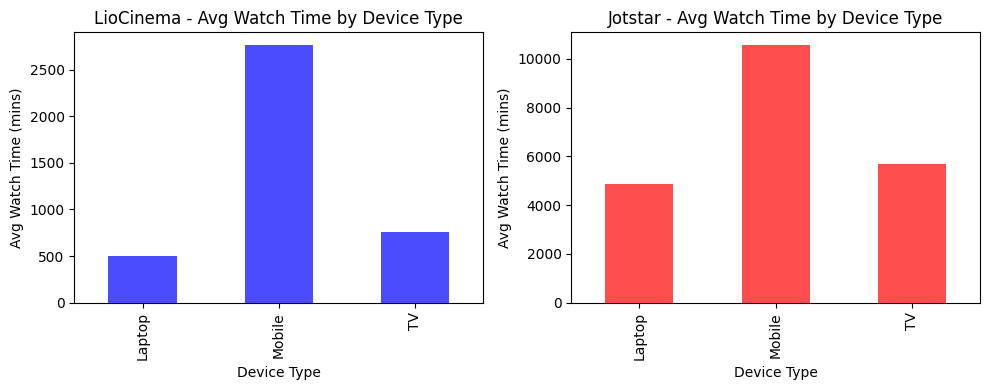

In [46]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_device_watch.plot(kind="bar", color="blue", alpha=0.7)
plt.title("LioCinema - Avg Watch Time by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Avg Watch Time (mins)")

plt.subplot(1, 2, 2)
jot_device_watch.plot(kind="bar", color="red", alpha=0.7)
plt.title("Jotstar - Avg Watch Time by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Avg Watch Time (mins)")

plt.tight_layout()
plt.show()

## 6. How do inactivity patterns correlate with total watch time or average watch time? Are less engaged users more likely to become inactive?

### Define Active vs Inactive Users 

In [47]:
# Classify users as active (last_active_date is NULL) or inactive
lio_subs["is_active"] = lio_subs["last_active_date"].isna()
jot_subs["is_active"] = jot_subs["last_active_date"].isna()

### Merge Watch Time with Subscriber Data

In [48]:
# Merge watch data with subscriber data to get activity status
lio_data = lio_watch.merge(lio_subs[["user_id", "is_active"]], on="user_id")
jot_data = jot_watch.merge(jot_subs[["user_id", "is_active"]], on="user_id")

### Compare Average Watch Time for Active vs. Inactive Users

In [50]:
# Group by activity status and calculate average watch time
lio_watch_activity = lio_data.groupby("is_active")["total_watch_time_mins"].mean()
jot_watch_activity = jot_data.groupby("is_active")["total_watch_time_mins"].mean()

print("\nLioCinema - Avg Watch Time (Active vs. Inactive):\n", lio_watch_activity)
print("\nJotstar - Avg Watch Time (Active vs. Inactive):\n", jot_watch_activity)


LioCinema - Avg Watch Time (Active vs. Inactive):
 is_active
False     717.340684
True     1880.721356
Name: total_watch_time_mins, dtype: float64

Jotstar - Avg Watch Time (Active vs. Inactive):
 is_active
False    1970.944528
True     7921.646738
Name: total_watch_time_mins, dtype: float64


### Analyze Engagement Levels and Inactivity Risk

In [52]:
# Define engagement levels using percentiles
lio_data["engagement_level"] = pd.qcut(lio_data["total_watch_time_mins"], q=3, labels=["Low", "Medium", "High"])
jot_data["engagement_level"] = pd.qcut(jot_data["total_watch_time_mins"], q=3, labels=["Low", "Medium", "High"])

# Calculate inactivity rate for each engagement level
lio_engagement_inactivity = lio_data.groupby("engagement_level")["is_active"].mean() * 100
jot_engagement_inactivity = jot_data.groupby("engagement_level")["is_active"].mean() * 100

print("\nLioCinema - Inactivity Rate by Engagement Level:\n", lio_engagement_inactivity)
print("\nJotstar - Inactivity Rate by Engagement Level:\n", jot_engagement_inactivity)


LioCinema - Inactivity Rate by Engagement Level:
 engagement_level
Low       60.717988
Medium    65.824956
High      84.783987
Name: is_active, dtype: float64

Jotstar - Inactivity Rate by Engagement Level:
 engagement_level
Low       63.863738
Medium    92.863225
High      98.549718
Name: is_active, dtype: float64


C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\68168204.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lio_engagement_inactivity = lio_data.groupby("engagement_level")["is_active"].mean() * 100
C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\68168204.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jot_engagement_inactivity = jot_data.groupby("engagement_level")["is_active"].mean() * 100


### Average Watch Time of Active vs. Inactive Users

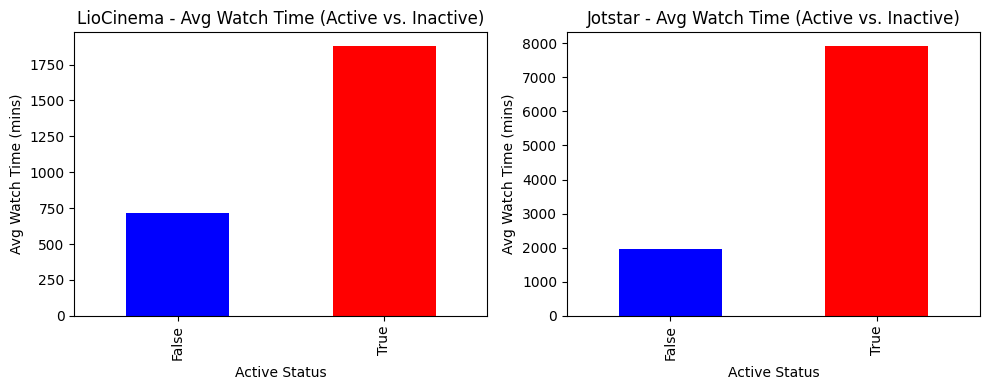

In [53]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_watch_activity.plot(kind="bar", color=["blue", "red"])
plt.title("LioCinema - Avg Watch Time (Active vs. Inactive)")
plt.xlabel("Active Status")
plt.ylabel("Avg Watch Time (mins)")

plt.subplot(1, 2, 2)
jot_watch_activity.plot(kind="bar", color=["blue", "red"])
plt.title("Jotstar - Avg Watch Time (Active vs. Inactive)")
plt.xlabel("Active Status")
plt.ylabel("Avg Watch Time (mins)")

plt.tight_layout()
plt.show()

### Inactivity Rate by Engagement Level

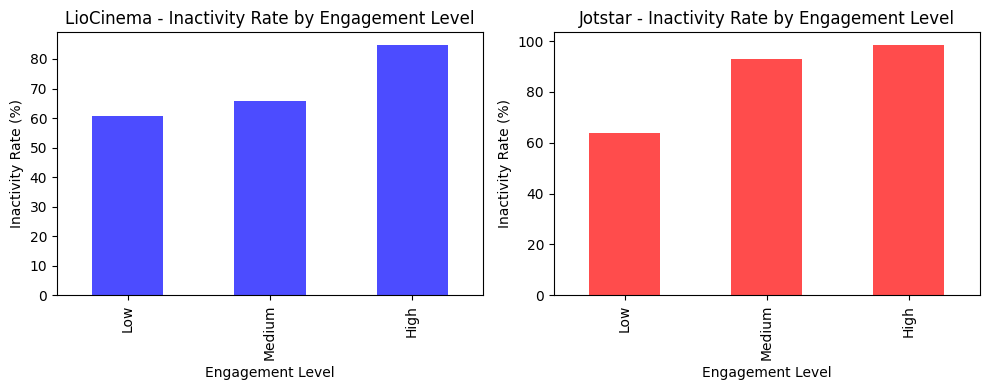

In [54]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
lio_engagement_inactivity.plot(kind="bar", color="blue", alpha=0.7)
plt.title("LioCinema - Inactivity Rate by Engagement Level")
plt.xlabel("Engagement Level")
plt.ylabel("Inactivity Rate (%)")

plt.subplot(1, 2, 2)
jot_engagement_inactivity.plot(kind="bar", color="red", alpha=0.7)
plt.title("Jotstar - Inactivity Rate by Engagement Level")
plt.xlabel("Engagement Level")
plt.ylabel("Inactivity Rate (%)")

plt.tight_layout()
plt.show()

## 7. How do downgrade trends differ between LioCinema and Jotstar? Are downgrades more prevalent on one platform compared to the other?

### Identify Downgraded Users 

In [55]:
# Define downgrade conditions for LioCinema
lio_downgrade = lio_subs[
    (lio_subs["plan_change_date"].notna()) & 
    (lio_subs["new_subscription_plan"].isin(["Free", "Basic"])) & 
    (lio_subs["subscription_plan"] == "Premium")
]

# Define downgrade conditions for Jotstar
jot_downgrade = jot_subs[
    (jot_subs["plan_change_date"].notna()) & 
    (jot_subs["new_subscription_plan"].isin(["Free", "VIP"])) & 
    (jot_subs["subscription_plan"] == "Premium")
]

# Count downgrades
total_lio_downgrades = len(lio_downgrade)
total_jot_downgrades = len(jot_downgrade)

print(f"Total Downgrades on LioCinema: {total_lio_downgrades}")
print(f"Total Downgrades on Jotstar: {total_jot_downgrades}")

Total Downgrades on LioCinema: 10550
Total Downgrades on Jotstar: 593


### Comparing Downgrade rates

In [56]:
lio_downgrade_rate = (total_lio_downgrades / len(lio_subs)) * 100
jot_downgrade_rate = (total_jot_downgrades / len(jot_subs)) * 100

print(f"LioCinema Downgrade Rate: {lio_downgrade_rate:.2f}%")
print(f"Jotstar Downgrade Rate: {jot_downgrade_rate:.2f}%")

LioCinema Downgrade Rate: 5.75%
Jotstar Downgrade Rate: 1.33%


### Analyze downgrades by subscription plan 

In [57]:
# Group by old and new plans to count downgrade transitions
lio_downgrade_trend = lio_downgrade.groupby(["subscription_plan", "new_subscription_plan"]).size()
jot_downgrade_trend = jot_downgrade.groupby(["subscription_plan", "new_subscription_plan"]).size()

print("\nLioCinema - Downgrade Transitions:\n", lio_downgrade_trend)
print("\nJotstar - Downgrade Transitions:\n", jot_downgrade_trend)


LioCinema - Downgrade Transitions:
 subscription_plan  new_subscription_plan
Premium            Basic                    3111
                   Free                     7439
dtype: int64

Jotstar - Downgrade Transitions:
 subscription_plan  new_subscription_plan
Premium            Free                     225
                   VIP                      368
dtype: int64


### Analyze Downgrades by Time Trends

In [58]:
# Convert plan_change_date to datetime
lio_downgrade["plan_change_date"] = pd.to_datetime(lio_downgrade["plan_change_date"])
jot_downgrade["plan_change_date"] = pd.to_datetime(jot_downgrade["plan_change_date"])

# Group downgrades by month
lio_downgrade_trend = lio_downgrade.groupby(lio_downgrade["plan_change_date"].dt.to_period("M")).size()
jot_downgrade_trend = jot_downgrade.groupby(jot_downgrade["plan_change_date"].dt.to_period("M")).size()

print("\nLioCinema - Downgrades by Month:\n", lio_downgrade_trend)
print("\nJotstar - Downgrades by Month:\n", jot_downgrade_trend)


LioCinema - Downgrades by Month:
 plan_change_date
2024-02     204
2024-03     430
2024-04     485
2024-05     610
2024-06     942
2024-07    1025
2024-08    1124
2024-09    1245
2024-10    1290
2024-11    1761
2024-12    1434
Freq: M, dtype: int64

Jotstar - Downgrades by Month:
 plan_change_date
2024-02     12
2024-03     16
2024-04     23
2024-05     35
2024-06     42
2024-07     51
2024-08     64
2024-09     61
2024-10     65
2024-11     80
2024-12    144
Freq: M, dtype: int64


C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\1169084177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lio_downgrade["plan_change_date"] = pd.to_datetime(lio_downgrade["plan_change_date"])
C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\1169084177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jot_downgrade["plan_change_date"] = pd.to_datetime(jot_downgrade["plan_change_date"])


#### Visualizing Downgrade Trends

#### (a) Total Downgrade Comparison

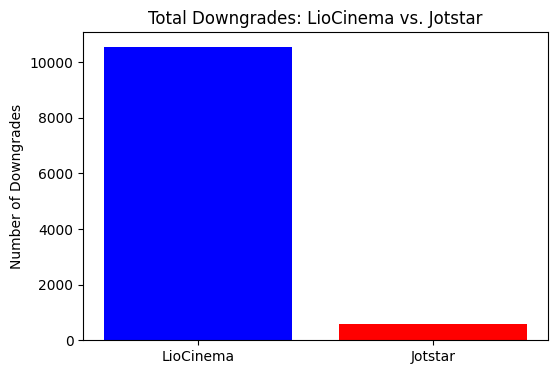

In [59]:
# Bar chart comparing total downgrades
plt.figure(figsize=(6, 4))
plt.bar(["LioCinema", "Jotstar"], [total_lio_downgrades, total_jot_downgrades], color=["blue", "red"])
plt.title("Total Downgrades: LioCinema vs. Jotstar")
plt.ylabel("Number of Downgrades")
plt.show()

#### (b) Monthly Downgrade Trends

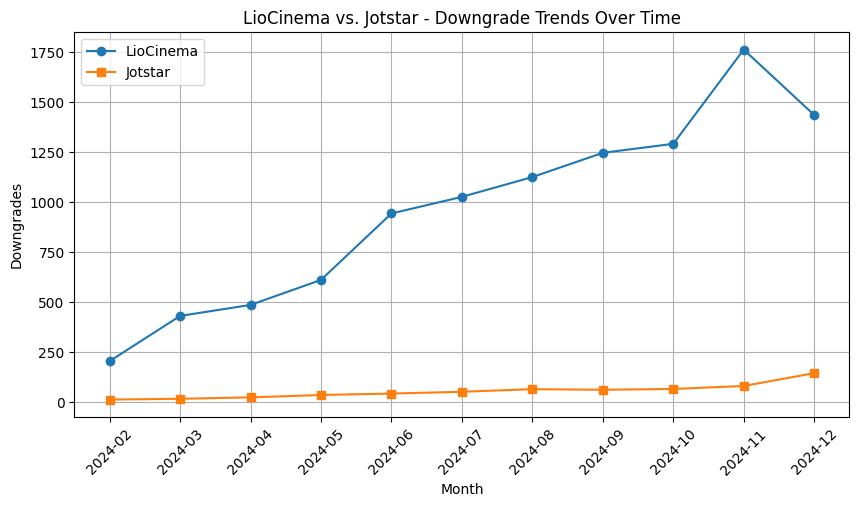

In [60]:
plt.figure(figsize=(10, 5))

plt.plot(lio_downgrade_trend.index.astype(str), lio_downgrade_trend.values, marker='o', linestyle='-', label="LioCinema")
plt.plot(jot_downgrade_trend.index.astype(str), jot_downgrade_trend.values, marker='s', linestyle='-', label="Jotstar")

plt.xlabel("Month")
plt.ylabel("Downgrades")
plt.title("LioCinema vs. Jotstar - Downgrade Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 8. What are the most common upgrade transitions (e.g., Free to Basic, Free to VIP, Free to Premium) for LioCinema and Jotstar? How do these differ across platforms?

### Identifying Upgrade Transitions

In [61]:
# Define upgrade conditions for LioCinema
lio_upgrades = lio_subs[
    (lio_subs["plan_change_date"].notna()) &  # Users who changed plans
    (
        (lio_subs["subscription_plan"] == "Free") & (lio_subs["new_subscription_plan"].isin(["Basic", "Premium"])) |
        (lio_subs["subscription_plan"] == "Basic") & (lio_subs["new_subscription_plan"] == "Premium")
    )
]

# Define upgrade conditions for Jotstar
jot_upgrades = jot_subs[
    (jot_subs["plan_change_date"].notna()) &  # Users who changed plans
    (
        (jot_subs["subscription_plan"] == "Free") & (jot_subs["new_subscription_plan"].isin(["VIP", "Premium"])) |
        (jot_subs["subscription_plan"] == "VIP") & (jot_subs["new_subscription_plan"] == "Premium")
    )
]

# Count total upgrades
total_lio_upgrades = len(lio_upgrades)
total_jot_upgrades = len(jot_upgrades)

print(f"Total Upgrades on LioCinema: {total_lio_upgrades}")
print(f"Total Upgrades on Jotstar: {total_jot_upgrades}")

Total Upgrades on LioCinema: 4155
Total Upgrades on Jotstar: 4348


### Most Common Upgrade Transitions

In [62]:
# Group by old and new plans to count upgrade transitions
lio_upgrade_trend = lio_upgrades.groupby(["subscription_plan", "new_subscription_plan"]).size().reset_index(name="count")
jot_upgrade_trend = jot_upgrades.groupby(["subscription_plan", "new_subscription_plan"]).size().reset_index(name="count")

print("\nLioCinema - Most Common Upgrade Transitions:\n", lio_upgrade_trend)
print("\nJotstar - Most Common Upgrade Transitions:\n", jot_upgrade_trend)


LioCinema - Most Common Upgrade Transitions:
   subscription_plan new_subscription_plan  count
0             Basic               Premium   1362
1              Free                 Basic   2078
2              Free               Premium    715

Jotstar - Most Common Upgrade Transitions:
   subscription_plan new_subscription_plan  count
0              Free               Premium    683
1              Free                   VIP    844
2               VIP               Premium   2821


### Comparing Upgrade Rates

In [63]:
lio_upgrade_rate = (total_lio_upgrades / len(lio_subs)) * 100
jot_upgrade_rate = (total_jot_upgrades / len(jot_subs)) * 100

print(f"LioCinema Upgrade Rate: {lio_upgrade_rate:.2f}%")
print(f"Jotstar Upgrade Rate: {jot_upgrade_rate:.2f}%")

LioCinema Upgrade Rate: 2.26%
Jotstar Upgrade Rate: 9.74%


### Visualizing Upgrade Trends

### (a) Total Upgrade Comparison

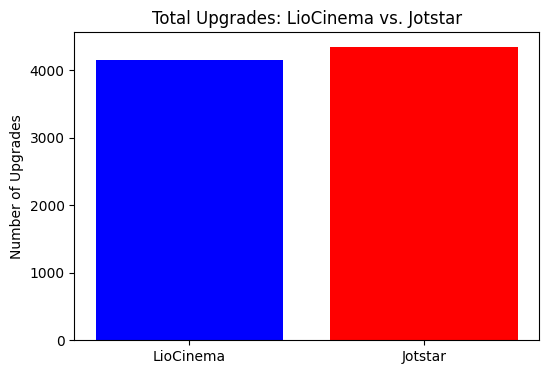

In [64]:
# Bar chart comparing total upgrades
plt.figure(figsize=(6, 4))
plt.bar(["LioCinema", "Jotstar"], [total_lio_upgrades, total_jot_upgrades], color=["blue", "red"])
plt.title("Total Upgrades: LioCinema vs. Jotstar")
plt.ylabel("Number of Upgrades")
plt.show()

### (b) Most Common Upgrade Transitions

In [66]:
!pip install seaborn

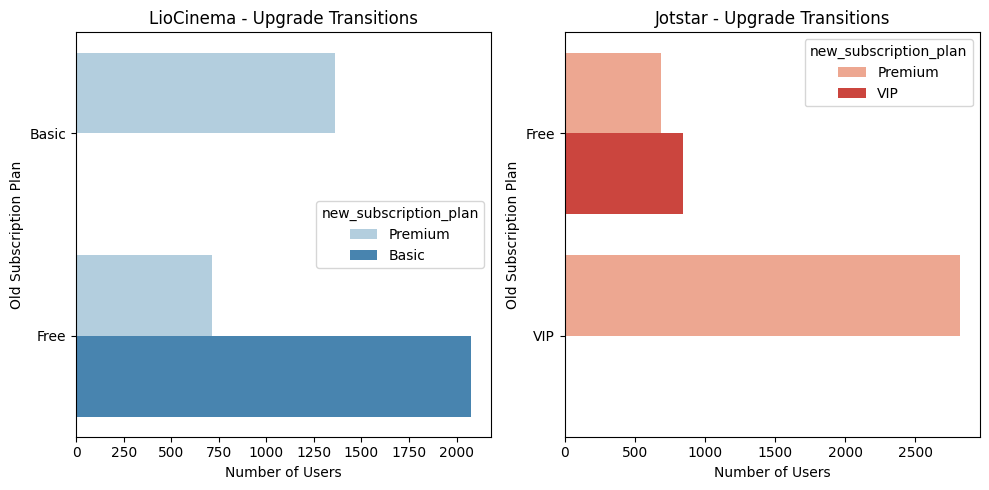

In [67]:
import seaborn as sns

plt.figure(figsize=(10, 5))

# Plot LioCinema upgrades
plt.subplot(1, 2, 1)
sns.barplot(data=lio_upgrade_trend, x="count", y="subscription_plan", hue="new_subscription_plan", palette="Blues")
plt.title("LioCinema - Upgrade Transitions")
plt.xlabel("Number of Users")
plt.ylabel("Old Subscription Plan")

# Plot Jotstar upgrades
plt.subplot(1, 2, 2)
sns.barplot(data=jot_upgrade_trend, x="count", y="subscription_plan", hue="new_subscription_plan", palette="Reds")
plt.title("Jotstar - Upgrade Transitions")
plt.xlabel("Number of Users")
plt.ylabel("Old Subscription Plan")

plt.tight_layout()
plt.show()

### 9. How does the paid user percentage (e.g., Basic, Premium for LioCinema; VIP, Premium for Jotstar) vary across different platforms? Analyse the proportion of premium users in Tier 1, Tier 2, and Tier 3 cities and identify any notable trends or differences.

### Calculate the Paid User Percentage for Each Platform

In [68]:
# Define paid users for LioCinema
lio_paid_users = lio_subs[lio_subs["subscription_plan"].isin(["Basic", "Premium"])]

# Define paid users for Jotstar
jot_paid_users = jot_subs[jot_subs["subscription_plan"].isin(["VIP", "Premium"])]

# Calculate percentage of paid users
lio_paid_pct = (len(lio_paid_users) / len(lio_subs)) * 100
jot_paid_pct = (len(jot_paid_users) / len(jot_subs)) * 100

print(f"LioCinema Paid User Percentage: {lio_paid_pct:.2f}%")
print(f"Jotstar Paid User Percentage: {jot_paid_pct:.2f}%")

LioCinema Paid User Percentage: 42.77%
Jotstar Paid User Percentage: 72.89%


### Breakdown of Premium Users by City Tier

In [69]:
# Filter only Premium users
lio_premium_users = lio_subs[lio_subs["subscription_plan"] == "Premium"]
jot_premium_users = jot_subs[jot_subs["subscription_plan"] == "Premium"]

# Calculate percentage of Premium users in each city tier
lio_premium_by_tier = lio_premium_users["city_tier"].value_counts(normalize=True) * 100
jot_premium_by_tier = jot_premium_users["city_tier"].value_counts(normalize=True) * 100

print("\nLioCinema - Premium Users by City Tier:\n", lio_premium_by_tier)
print("\nJotstar - Premium Users by City Tier:\n", jot_premium_by_tier)


LioCinema - Premium Users by City Tier:
 city_tier
Tier 1    41.072852
Tier 2    36.226686
Tier 3    22.700462
Name: proportion, dtype: float64

Jotstar - Premium Users by City Tier:
 city_tier
Tier 1    76.142740
Tier 2    19.196529
Tier 3     4.660732
Name: proportion, dtype: float64


### Compare Paid User Distribution by City Tier

In [70]:
# Group paid users by city tier
lio_paid_by_tier = lio_paid_users["city_tier"].value_counts(normalize=True) * 100
jot_paid_by_tier = jot_paid_users["city_tier"].value_counts(normalize=True) * 100

print("\nLioCinema - Paid Users by City Tier:\n", lio_paid_by_tier)
print("\nJotstar - Paid Users by City Tier:\n", jot_paid_by_tier)


LioCinema - Paid Users by City Tier:
 city_tier
Tier 2    40.354858
Tier 3    30.839728
Tier 1    28.805415
Name: proportion, dtype: float64

Jotstar - Paid Users by City Tier:
 city_tier
Tier 1    62.538433
Tier 2    28.778748
Tier 3     8.682819
Name: proportion, dtype: float64


### Visualizing the Results

### (a) Total Paid User Percentage

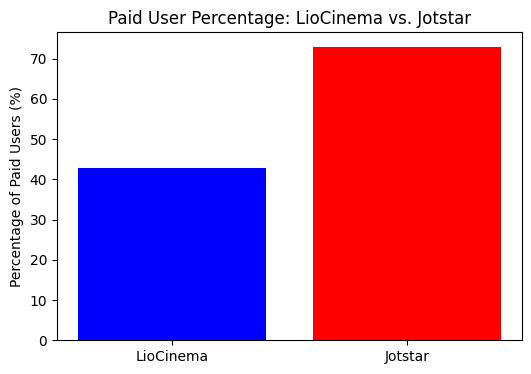

In [71]:
# Bar chart comparing paid user percentages
plt.figure(figsize=(6, 4))
plt.bar(["LioCinema", "Jotstar"], [lio_paid_pct, jot_paid_pct], color=["blue", "red"])
plt.title("Paid User Percentage: LioCinema vs. Jotstar")
plt.ylabel("Percentage of Paid Users (%)")
plt.show()

### (b) Premium Users by City Tier

C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\2754245366.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lio_premium_by_tier.index, y=lio_premium_by_tier.values, palette="Blues")
C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\2754245366.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jot_premium_by_tier.index, y=jot_premium_by_tier.values, palette="Reds")


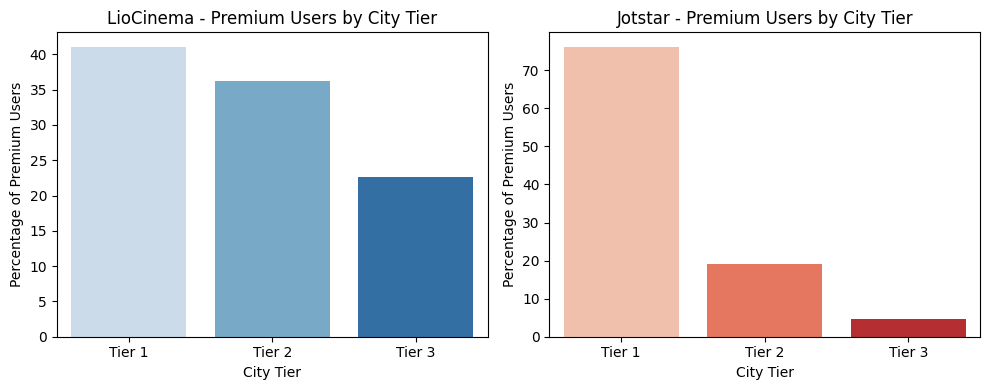

In [72]:
plt.figure(figsize=(10, 4))

# LioCinema premium users by city tier
plt.subplot(1, 2, 1)
sns.barplot(x=lio_premium_by_tier.index, y=lio_premium_by_tier.values, palette="Blues")
plt.title("LioCinema - Premium Users by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Percentage of Premium Users")

# Jotstar premium users by city tier
plt.subplot(1, 2, 2)
sns.barplot(x=jot_premium_by_tier.index, y=jot_premium_by_tier.values, palette="Reds")
plt.title("Jotstar - Premium Users by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Percentage of Premium Users")

plt.tight_layout()
plt.show()

### (c) Paid Users by City Tier

C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\1282489973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lio_paid_by_tier.index, y=lio_paid_by_tier.values, palette="Blues")
C:\Users\tirshiva\AppData\Local\Temp\ipykernel_28048\1282489973.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jot_paid_by_tier.index, y=jot_paid_by_tier.values, palette="Reds")


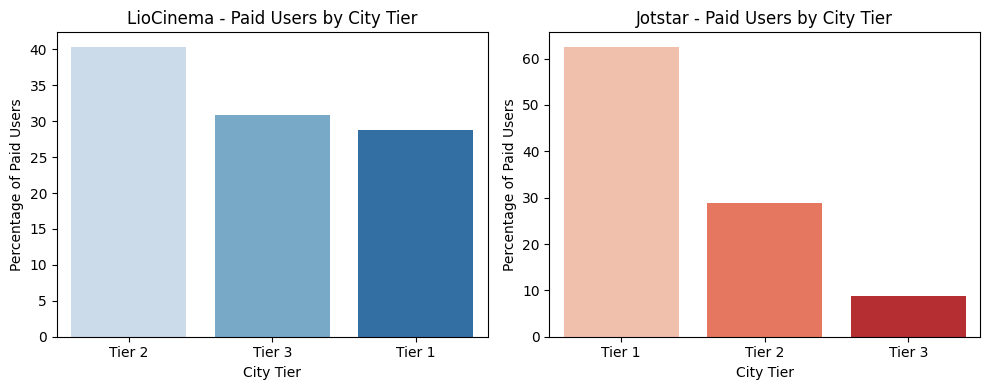

In [73]:
plt.figure(figsize=(10, 4))

# LioCinema paid users by city tier
plt.subplot(1, 2, 1)
sns.barplot(x=lio_paid_by_tier.index, y=lio_paid_by_tier.values, palette="Blues")
plt.title("LioCinema - Paid Users by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Percentage of Paid Users")

# Jotstar paid users by city tier
plt.subplot(1, 2, 2)
sns.barplot(x=jot_paid_by_tier.index, y=jot_paid_by_tier.values, palette="Reds")
plt.title("Jotstar - Paid Users by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Percentage of Paid Users")

plt.tight_layout()
plt.show()

### 10. Assume the following monthly subscription prices, calculate the total revenue generated by both platforms (LioCinema and Jotstar) for the analysis period (January to November 2024)

In [74]:
# Subscription prices
lio_prices = {"Basic": 69, "Premium": 129}
jot_prices = {"VIP": 159, "Premium": 359}

### Filter Subscribers for the Analysis Period

In [75]:
# Convert subscription dates to datetime format
lio_subs["subscription_date"] = pd.to_datetime(lio_subs["subscription_date"])
jot_subs["subscription_date"] = pd.to_datetime(jot_subs["subscription_date"])
lio_subs["plan_change_date"] = pd.to_datetime(lio_subs["plan_change_date"])
jot_subs["plan_change_date"] = pd.to_datetime(jot_subs["plan_change_date"])

# Filter subscribers who subscribed between Jan-Nov 2024
lio_active_subs = lio_subs[(lio_subs["subscription_date"] >= "2024-01-01") & 
                            (lio_subs["subscription_date"] <= "2024-11-30")]
jot_active_subs = jot_subs[(jot_subs["subscription_date"] >= "2024-01-01") & 
                            (jot_subs["subscription_date"] <= "2024-11-30")]

### Calculate Revenue Considering Subscription Duration

In [76]:
import numpy as np

# Function to calculate revenue for each user
def calculate_revenue(df, prices):
    total_revenue = 0

    for _, row in df.iterrows():
        start_date = row["subscription_date"]
        end_date = row["plan_change_date"] if pd.notna(row["plan_change_date"]) else pd.to_datetime("2024-11-30")

        # Calculate active months under the initial plan
        active_months = max((end_date.year - start_date.year) * 12 + (end_date.month - start_date.month), 1)

        # Revenue under initial plan
        if row["subscription_plan"] in prices:
            total_revenue += active_months * prices[row["subscription_plan"]]

        # If plan was upgraded/downgraded, consider new plan revenue
        if pd.notna(row["plan_change_date"]) and row["new_subscription_plan"] in prices:
            change_date = row["plan_change_date"]
            months_after_change = max((pd.to_datetime("2024-11-30").year - change_date.year) * 12 + (pd.to_datetime("2024-11-30").month - change_date.month), 1)
            total_revenue += months_after_change * prices[row["new_subscription_plan"]]

    return total_revenue

# Calculate revenue for each platform
lio_total_revenue = calculate_revenue(lio_active_subs, lio_prices)
jot_total_revenue = calculate_revenue(jot_active_subs, jot_prices)

print(f"Total Revenue for LioCinema (Jan-Nov 2024): ₹ {lio_total_revenue:,.2f}")
print(f"Total Revenue for Jotstar (Jan-Nov 2024): ₹ {jot_total_revenue:,.2f}")

Total Revenue for LioCinema (Jan-Nov 2024): ₹ 20,187,255.00
Total Revenue for Jotstar (Jan-Nov 2024): ₹ 42,184,236.00
